# **Mall Customer Segmentation Dataset**

This notebook provides an overview of the **Mall Customer Segmentation Dataset**. The dataset is designed for clustering and segmentation tasks in data analysis, helping businesses understand and categorize customer behavior in a retail setting.

---

## **1. Dataset Overview**
The **Mall Customer Segmentation Dataset** is a commonly used dataset for customer profiling and clustering tasks. It contains information about customers' demographic and spending patterns, which can be used to group customers into meaningful segments.

---

## **2. Key Characteristics**

### **Features**
The dataset contains the following features:

- **CustomerID**: Unique identifier for each customer.
- **Gender**: Gender of the customer (Male/Female).
- **Age**: Age of the customer.
- **Annual Income (k$)**: Annual income of the customer in thousands of dollars.
- **Spending Score (1-100)**: A score assigned to the customer based on their spending behavior and purchasing patterns.

---

### **Purpose of Dataset**
The dataset is suitable for **clustering** and customer segmentation tasks. Businesses can use insights from this dataset to:
- Group customers based on spending and income patterns.
- Design targeted marketing strategies for specific customer groups.
- Improve customer retention by understanding preferences and behavior.

---

### **Structure**
- **Type**: Tabular dataset.
- **Format**: CSV file.
- **Data Quality**: Clean dataset with no missing values, making it ready for clustering analysis.

---

### **Source**
- Shared by Kaggle user **Data Scientist Anna**.
\
https://www.kaggle.com/datasets/datascientistanna/customers-dataset
- The dataset is publicly available and intended for educational and research purposes.

---

### **Applications**
1. **Clustering Analysis**:
   - Identify customer groups based on age, income, and spending score.
2. **Customer Segmentation**:
   - Classify customers into actionable segments such as "high spenders" or "budget-conscious customers."
3. **Exploratory Data Analysis (EDA)**:
   - Analyze trends in spending and income across different age groups or genders.
4. **Visualization**:
   - Create scatter plots, bar charts, and heatmaps to better understand the data.

---

## **3. How to Use the Dataset**

### **Step 1: Exploratory Data Analysis (EDA)**
- Use Python libraries like `pandas`, `matplotlib`, and `seaborn` to summarize and visualize the data.
- Explore relationships between features, such as age vs. spending score.

### **Step 2: Feature Scaling**
- Normalize numerical features like `Age`, `Annual Income`, and `Spending Score` using methods such as `MinMaxScaler`.

### **Step 3: Clustering (K-Means)**
- Apply the K-Means algorithm from the `sklearn` library to group customers into clusters.
- Determine the optimal number of clusters using the **Elbow Method** or **Silhouette Score**.


### **Step 4: Insights**
- Use clustering results to:
  - Identify customer segments with similar spending behavior.
  - Design customized offers for high-value customers.
  - Target low-spending customers with incentives to increase engagement.

---

## **4. Potential Challenges**
- Determining the right number of clusters (K) for segmentation.
- Properly interpreting clusters in cases where features like income and spending are highly correlated.
- Incorporating additional features for a more comprehensive analysis.




In [301]:
#importing neccesary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
#

In [302]:
#reading the cvs file
df=pd.read_csv('/content/Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [303]:
#finding the datatypes,colums and rows /information of the data provided
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [304]:
# from the info we can see there are 2000 rows and 8 columns , two colomns have categorical data gender,profession, remaining numerical data

In [305]:
#finding the datatypes,colums and rows /information of the data provided
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"1,000.50",48.96,"110,731.82",50.96,4.10,3.77
std,577.49,28.43,"45,739.54",27.93,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00
25%,500.75,25.00,"74,572.00",28.00,1.00,2.00
50%,"1,000.50",48.00,"110,045.00",50.00,3.00,4.00
75%,"1,500.25",73.00,"149,092.75",75.00,7.00,5.00
max,"2,000.00",99.00,"189,974.00",100.00,17.00,9.00


In [306]:
#we can see diff between 75% and max values is high for 	Work Experience, Family size
#so boxplot and histplot is required for further analysis to find skewed data

In [307]:
# assigning numerical values for categorieal data namely gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [308]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,15000,39,Healthcare,1,4
1,2,0,21,35000,81,Engineer,3,3
2,3,1,20,86000,6,Engineer,1,1
3,4,1,23,59000,77,Lawyer,0,2
4,5,1,31,38000,40,Entertainment,2,6


In [309]:
#Assigned numerical values for gender male as 0 and female as 1

In [310]:
#finding the values for each profession
df['Profession'].value_counts()

,count
Profession,
Artist,612
Healthcare,339
Entertainment,234
Engineer,179
Doctor,161
Executive,153
Lawyer,142
Marketing,85
Homemaker,60


In [311]:
# Profession value counts for Artist is 612
# Profession value counts for Healthcare is 339
# Profession value counts for Entertainment is 234
# Profession value counts for Engineer is 179
# Profession value counts for Doctor is 161
# Profession value counts for Executive is 153
# Profession value counts for Lawyer is 142
# Profession value counts for Marketing is 85
# Profession value counts for Homemaker is 60

In [312]:
# assign values for each proffession
profession_mapping = {
    'Healthcare': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Entertainment': 4,
    'Artist': 5,
    'Executive': 6,
    'Doctor': 7,
    'Homemaker': 8,
    'Marketing': 9
}

df['Profession'] = df['Profession'].map(profession_mapping)
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,0,19,15000,39,1.00,1,4
1,2,0,21,35000,81,2.00,3,3
2,3,1,20,86000,6,2.00,1,1
3,4,1,23,59000,77,3.00,0,2
4,5,1,31,38000,40,4.00,2,6


In [313]:
# assigning numerical values for categorial data in Profession coloumn as
#'Healthcare': 1,
# 'Engineer': 2,
# 'Lawyer': 3,
# 'Entertainment': 4,
# 'Artist': 5,
# 'Executive': 6,
# 'Doctor': 7,
# 'Homemaker': 8,
# 'Marketing': 9

In [314]:
# Limit to 2 decimal points for all columns
pd.options.display.float_format = "{:,.2f}".format
df.describe()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","1,965.00","2,000.00","2,000.00"
mean,"1,000.50",0.59,48.96,"110,731.82",50.96,4.28,4.10,3.77
std,577.49,0.49,28.43,"45,739.54",27.93,2.20,3.92,1.97
min,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
25%,500.75,0.00,25.00,"74,572.00",28.00,2.00,1.00,2.00
50%,"1,000.50",1.00,48.00,"110,045.00",50.00,5.00,3.00,4.00
75%,"1,500.25",1.00,73.00,"149,092.75",75.00,5.00,7.00,5.00
max,"2,000.00",1.00,99.00,"189,974.00",100.00,9.00,17.00,9.00


In [315]:
#we can see diff between 75% and max values is high for Work Experience , Family Size, profession
#so boxplot and histplot is required for further analysis to find skewed data and outliers


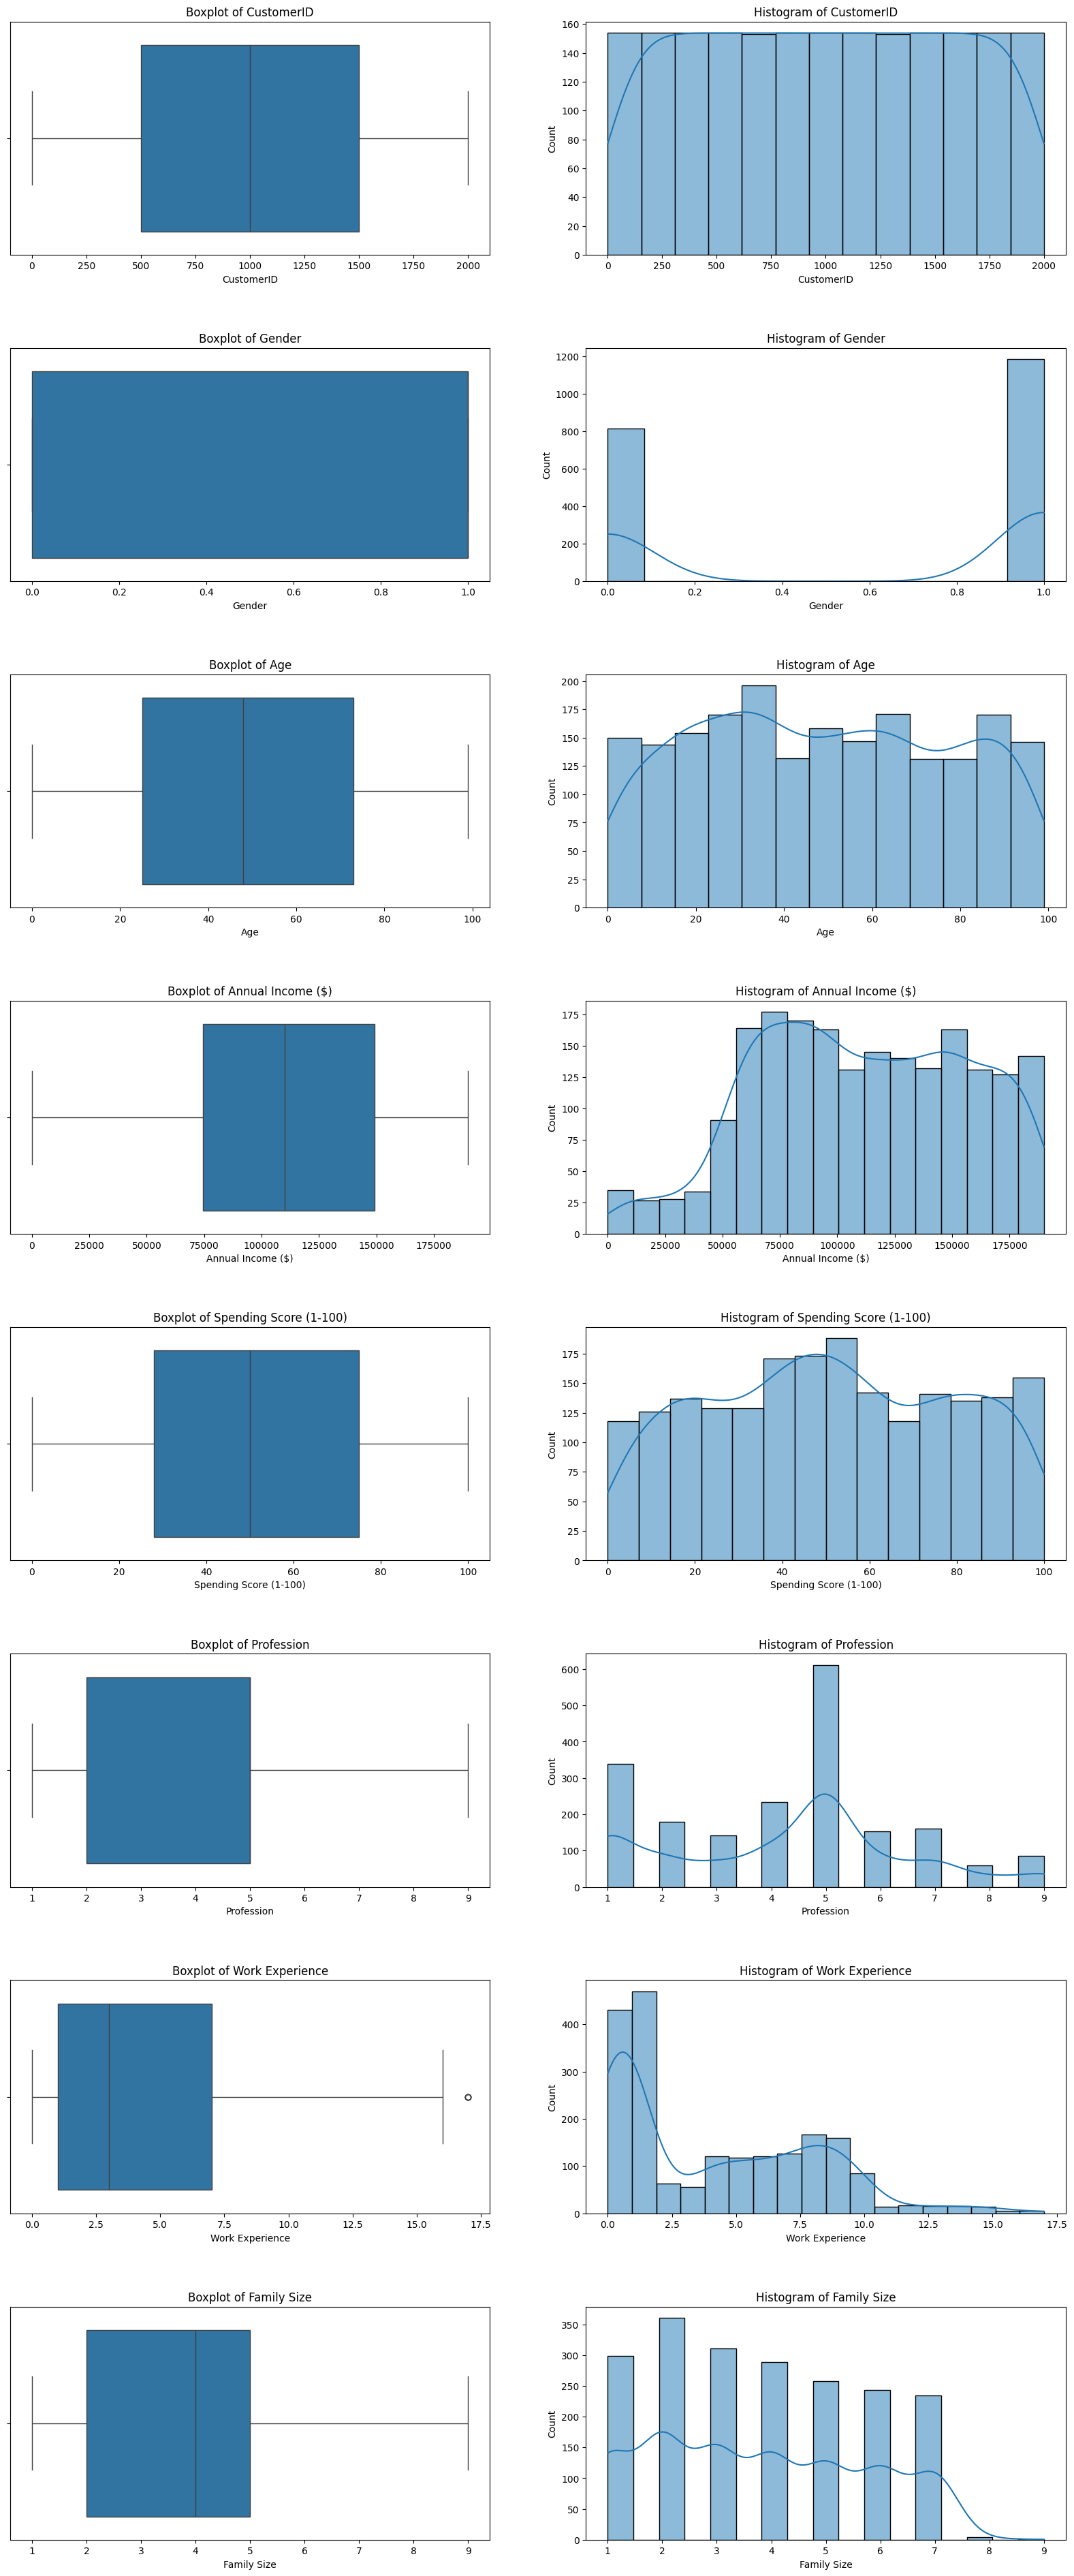

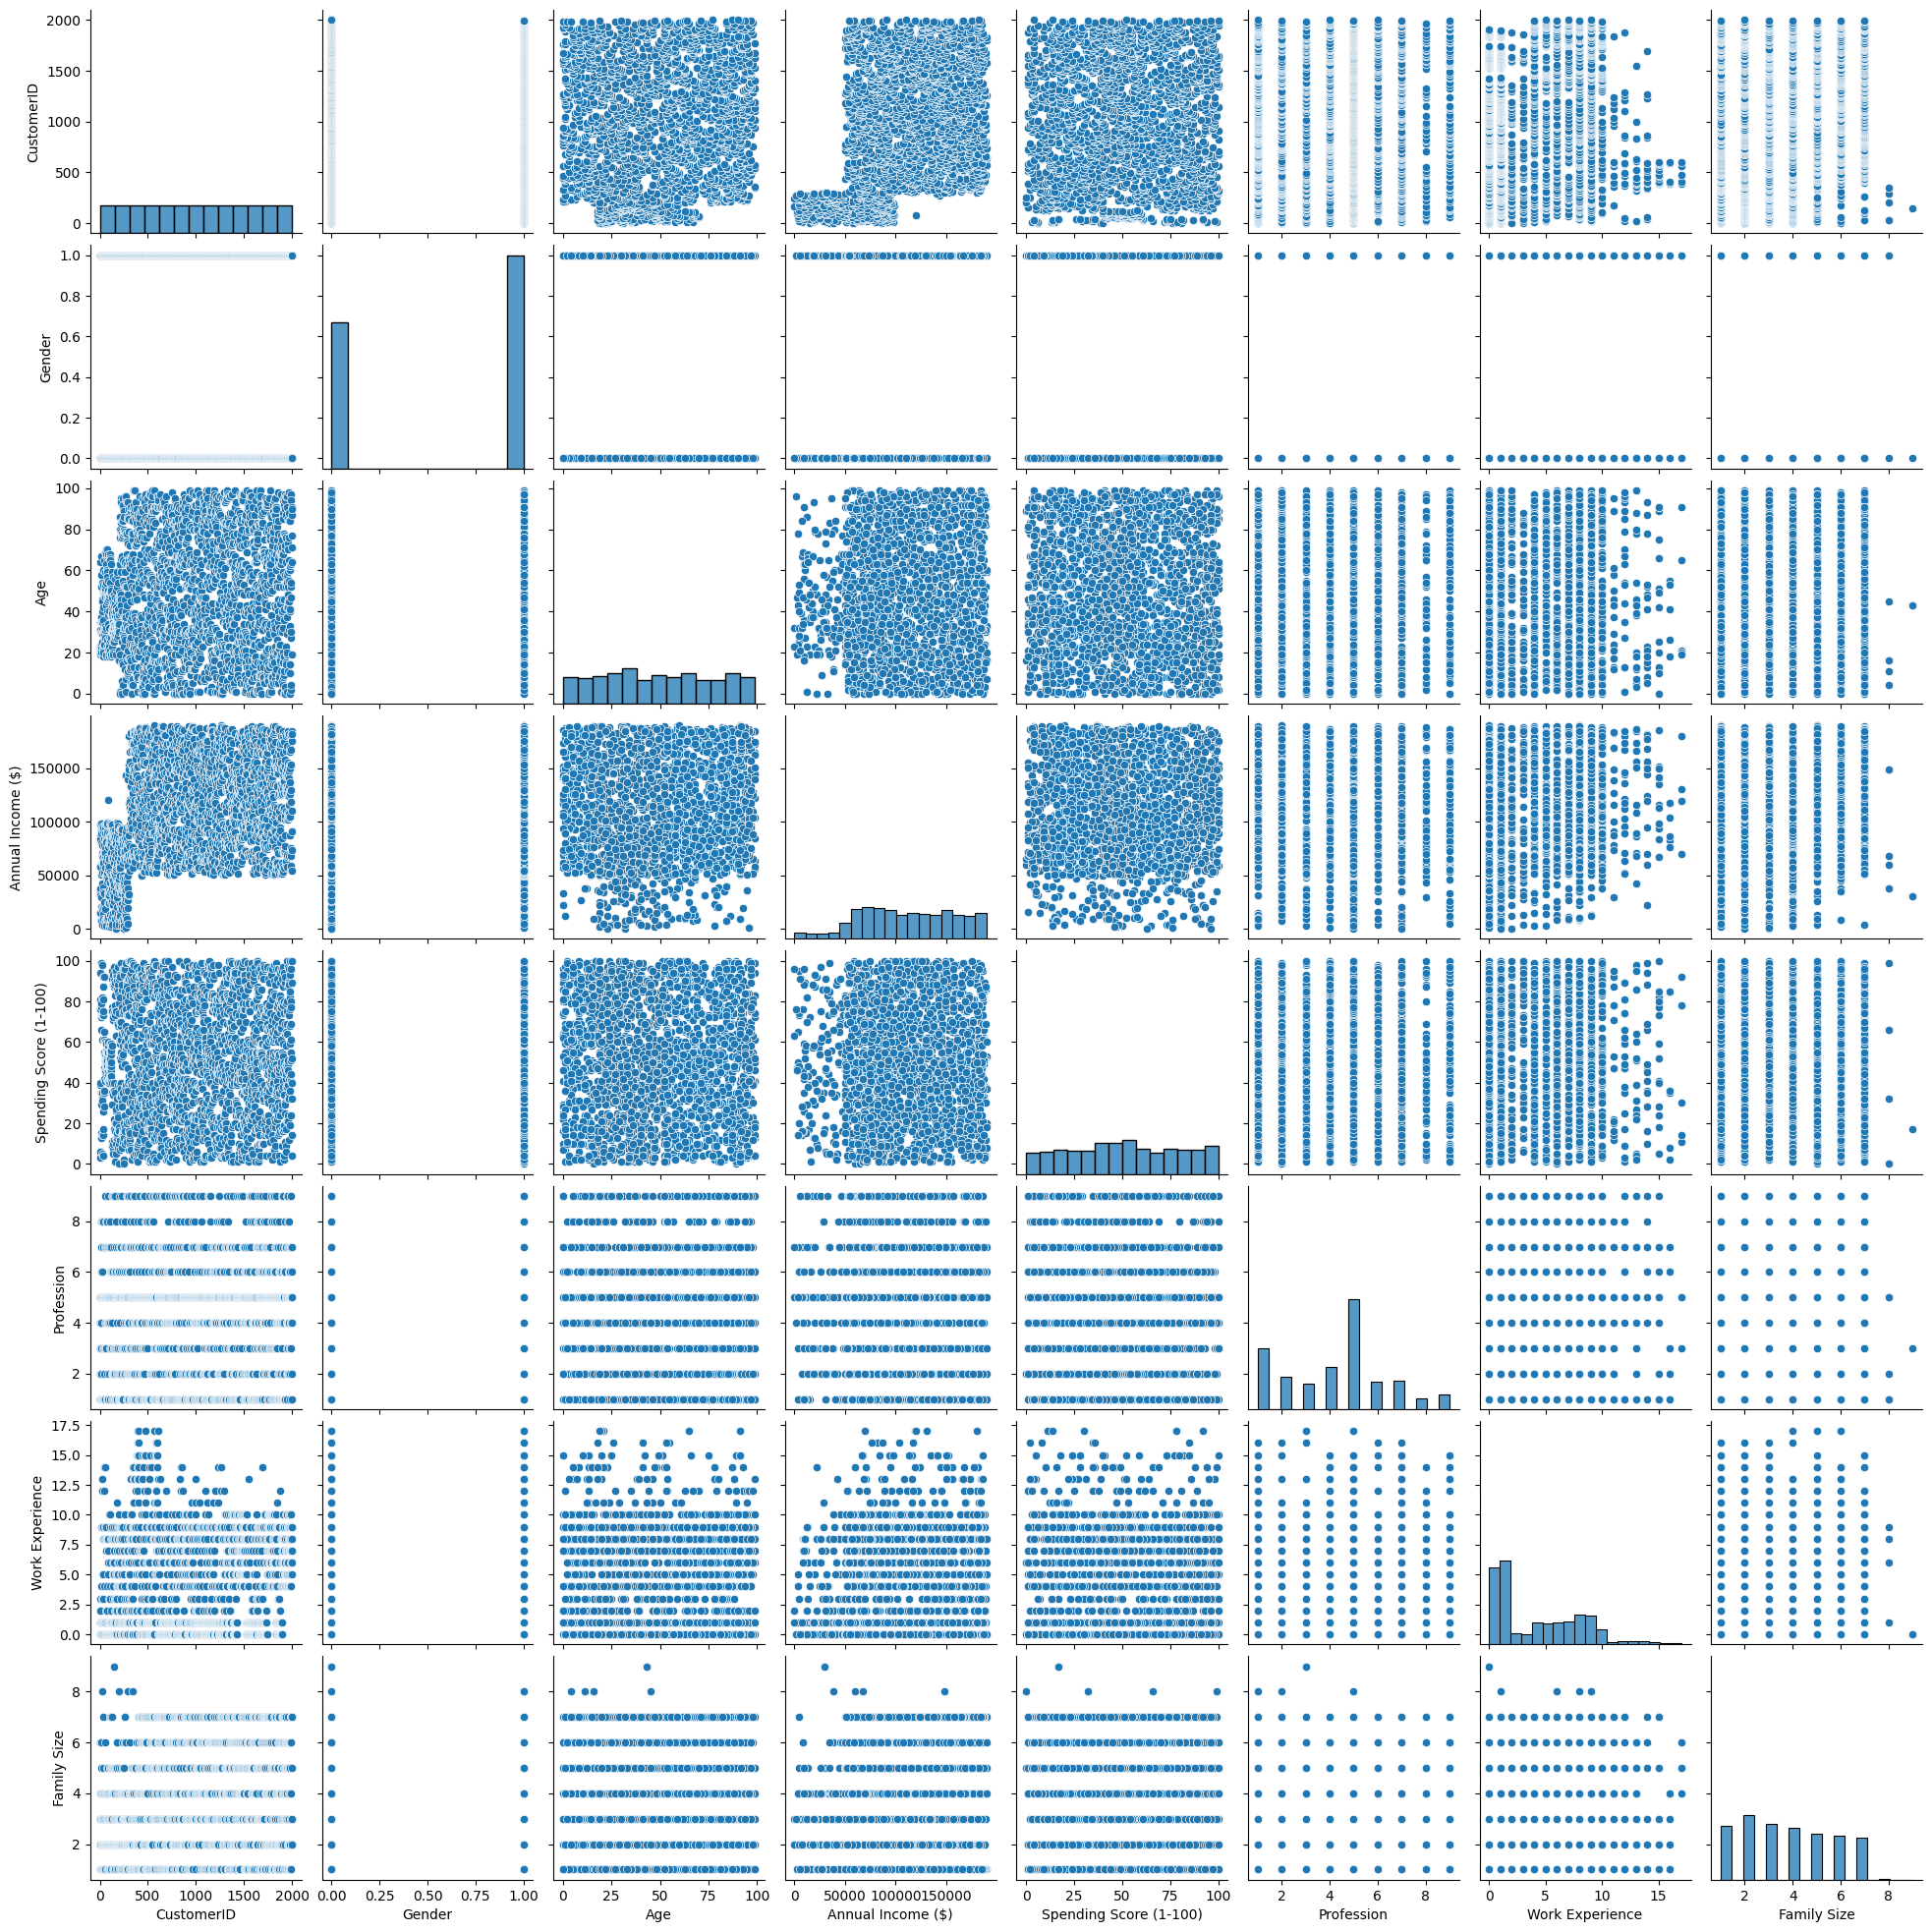

In [316]:
#visualizing the data using Boxplot and histogram
num_cols = len(df.select_dtypes(include=['number']).columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(20, 6 * num_cols))
plt.subplots_adjust(hspace=0.4) # Add space between subplots

for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col}')

    sns.histplot(x=df[col], kde=True, ax=axes[i, 1])
    axes[i,1].set_title(f'Histogram of {col}')
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()


In [317]:
#From data visualization
#Gender dose'nt have any outlier nor skewed and 1(female) has the highest count ~1200, male ~800 so more female coustmers
#Age dose'nt have any outliers nor skewed and data is concentrated more between ~25 to 74 so people of diff age groups present
#Annual income is concentrated more betweeen 75000 to 150000 and has no outliers so most coustmers have moderate annual income
#Spending score has no outliers nor skewed and most data is concentrated between ~28 to 75 so most coustmers have average spending score
#Profession most data is concentrated around 2 to 5, with 5 being highest so more coustmers have 'Engineer': 2,'Lawyer': 3,'Entertainment': 4,'Artist': 5,
#work experience has only one outlier is skewed to right and data is highly concentrated between ~1.5 to 7.5 so most coustmers have less work experience
#Family size is highly concentrated between 2 to 5 with highest family size as 2 and there are no outliers so most coustmers have average family size
# To conclude there are more female coustmers, Coustmers are of diff age groups present, most coustmers have moderate annual income and average spending score
#, most coustmers have these professions artist,engineer,lawyer, entertainment, most coustmers have less work experience and most coustmers have average family size


In [318]:
#From boxplot only work experience has outliers

In [319]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [320]:
# Profession column has 35 missing valuses so filling the missing values with mean

In [321]:
#Fill empty columns profession with mean values
for col in df.select_dtypes(include=np.number):
     df['Profession'] = df['Profession'].fillna(df['Profession'].mean())

In [322]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,0
Work Experience,0
Family Size,0


In [323]:
# Identify skewed columns
skewed_columns = ['Work Experience']

# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply outlier capping to skewed columns
for col in skewed_columns:
    df = cap_outliers_iqr(df, col)



In [324]:
# Using IQR method fixing the outliers for work experience coloumn

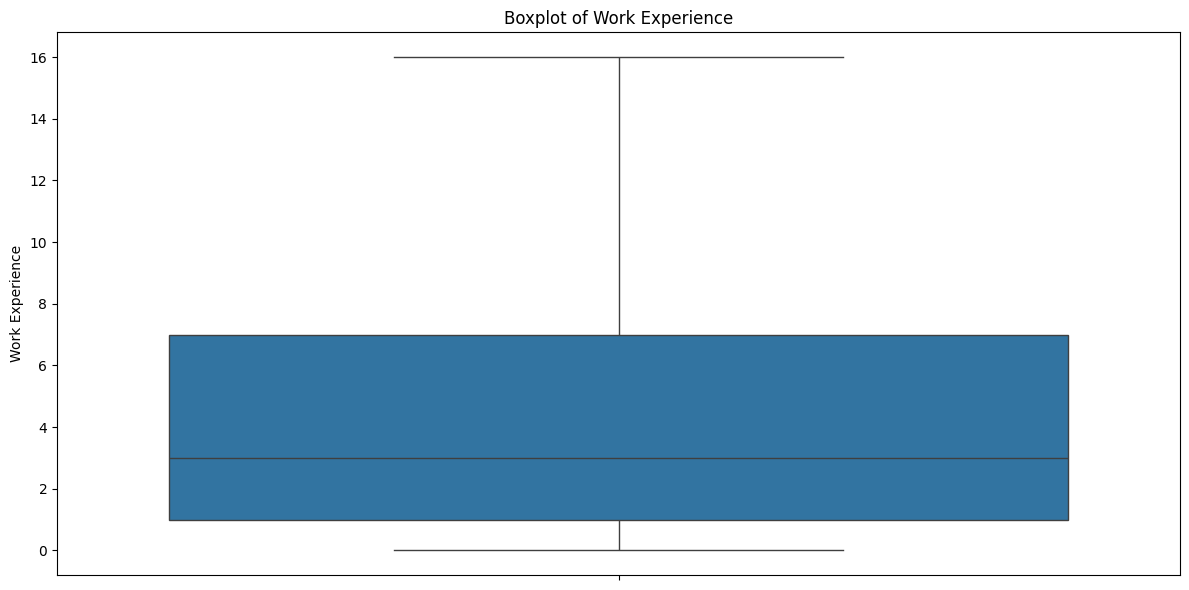

In [325]:
# Create boxplots for 'Work Experience'
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['Work Experience'])
plt.title('Boxplot of Work Experience')
plt.tight_layout()
plt.show()

In [326]:
#From the boxplot we can see there are no outliers for work experience

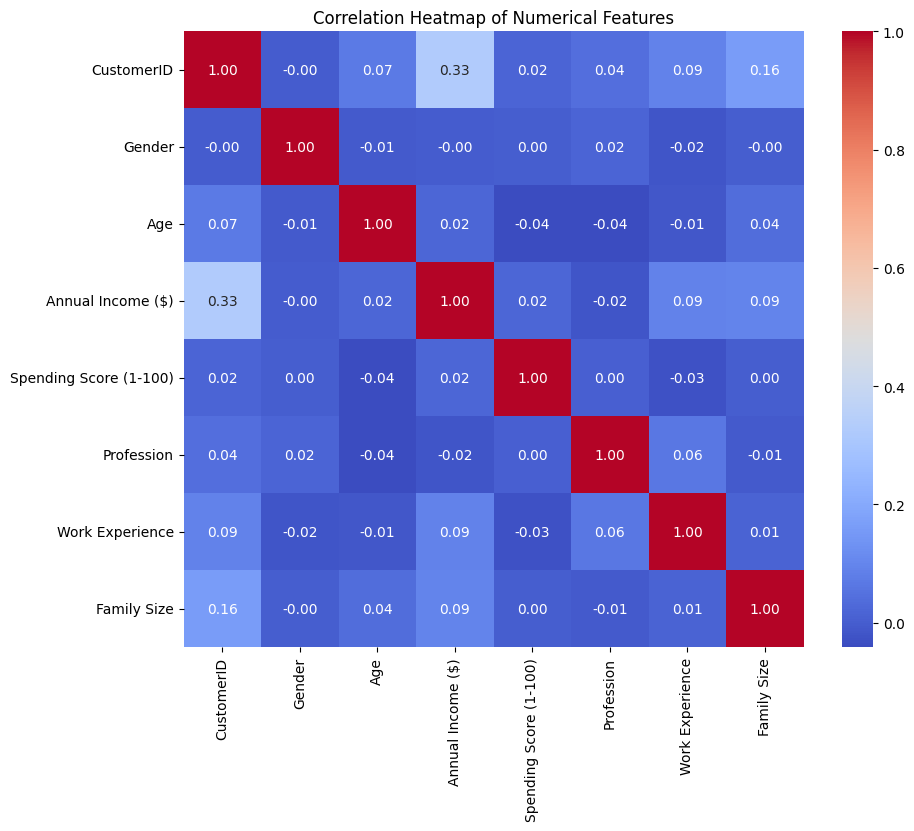

In [327]:
#Correlation heatmap
df_numeric = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

#Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [328]:
#from correlation heatmap we can see no features have high correlation with each other

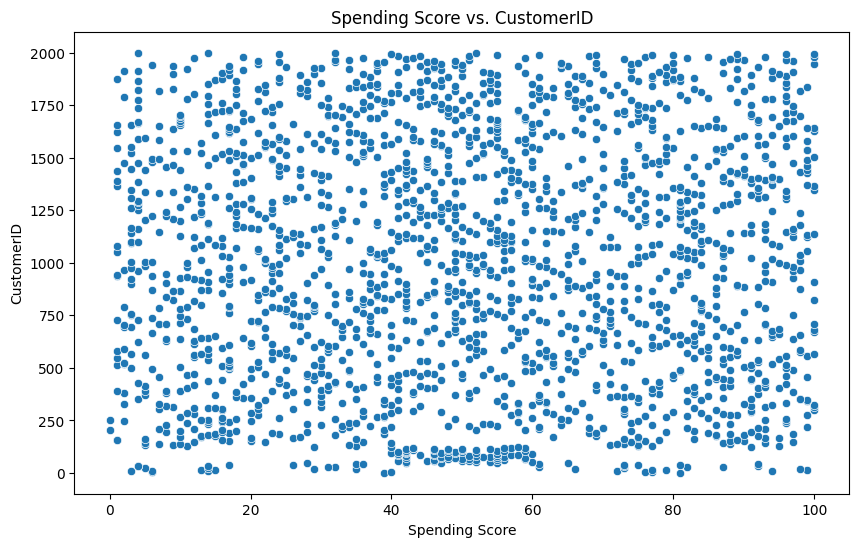

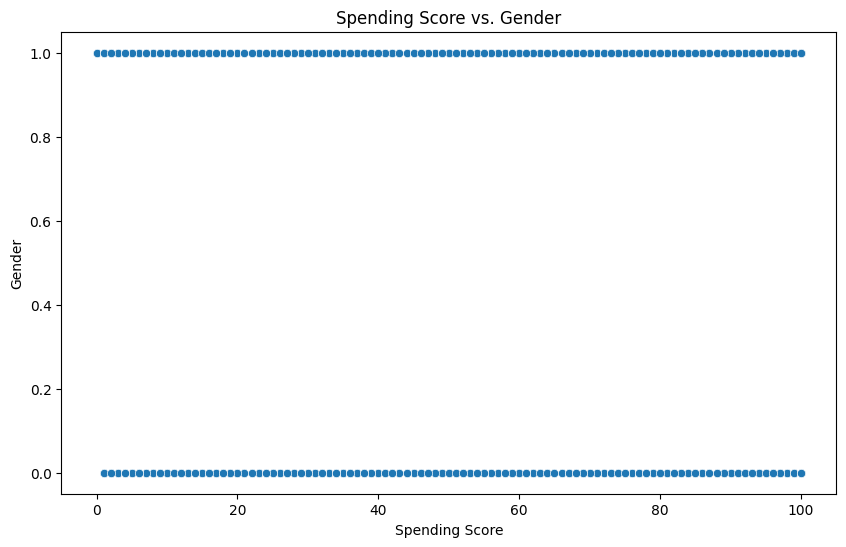

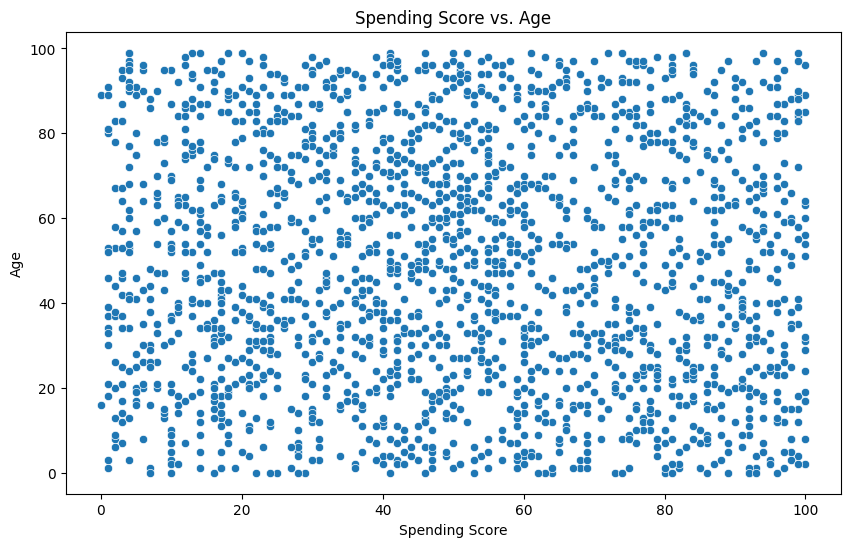

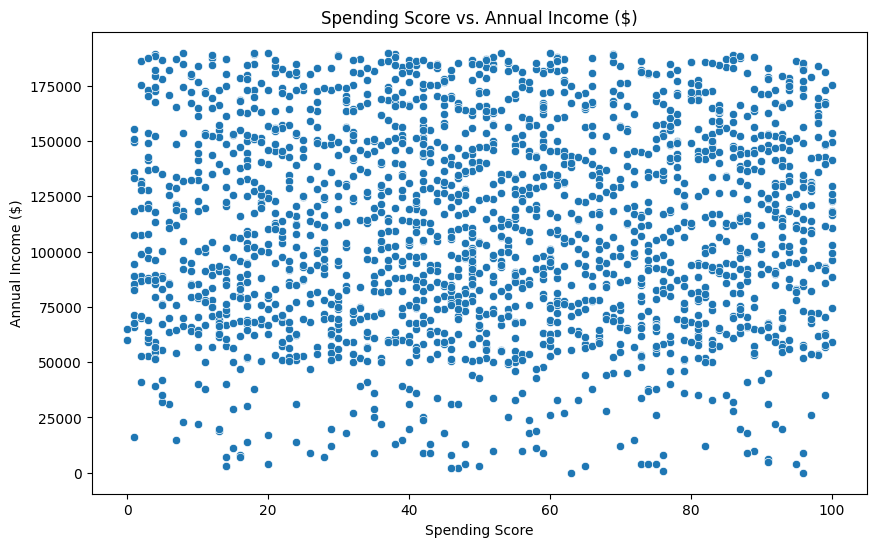

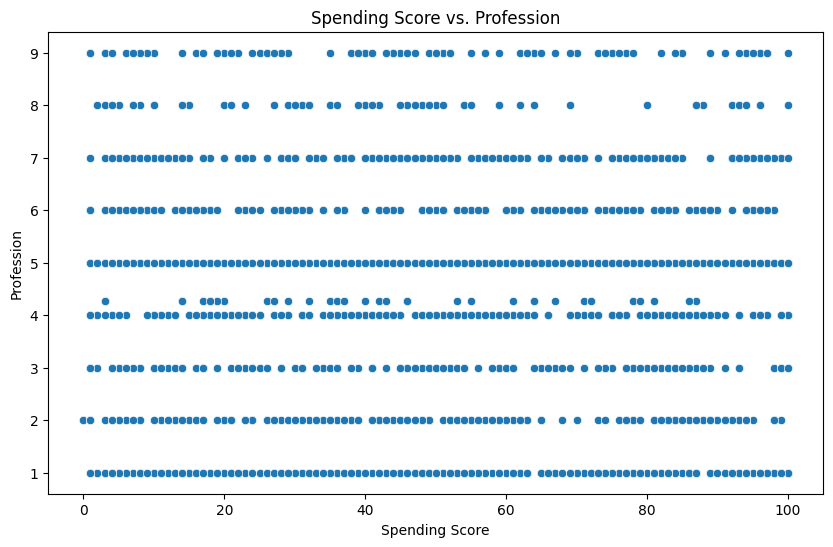

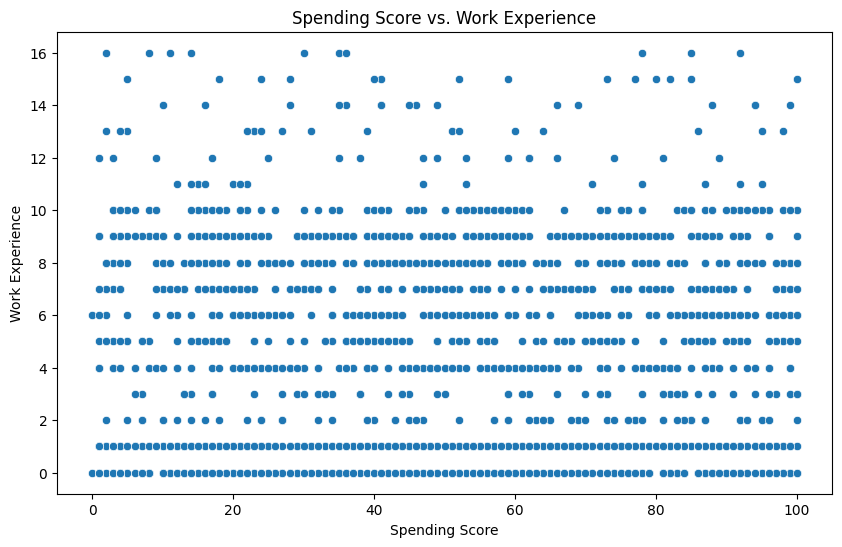

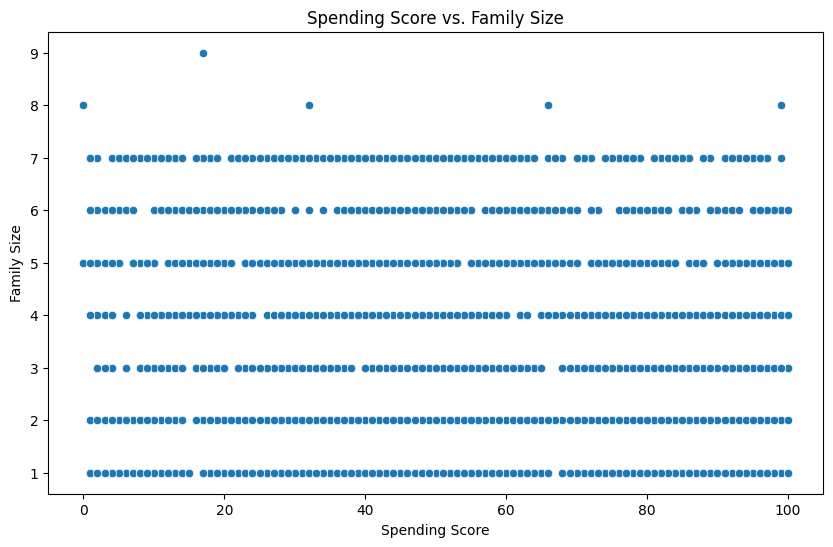

In [329]:
#  scatter plot between spending score and all other columns
for col in df.select_dtypes(include=np.number):
    if col != 'Spending Score (1-100)':  # Exclude 'Spending Score' itself
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Spending Score (1-100)', y=col, data=df, palette='rainbow')
        plt.title(f'Spending Score vs. {col}')
        plt.xlabel('Spending Score')
        plt.ylabel(col)
        plt.show()

In [330]:
# from the scatterplot for spending score and
# age -more datapoints are scattering around 20 to 60 so these age groups have high spending score
# annual income - above 50000 has more datapoints so coustmers with more than 50000 annual income have highspending score
#Profession- 5 which is artist, healthcare-1 have high spending score
#Work experience - more datapoint below 10 coustmers with less experience have high speending score
#Family size - more datapoints scattered around 1 to 7 so average family size has high spending score

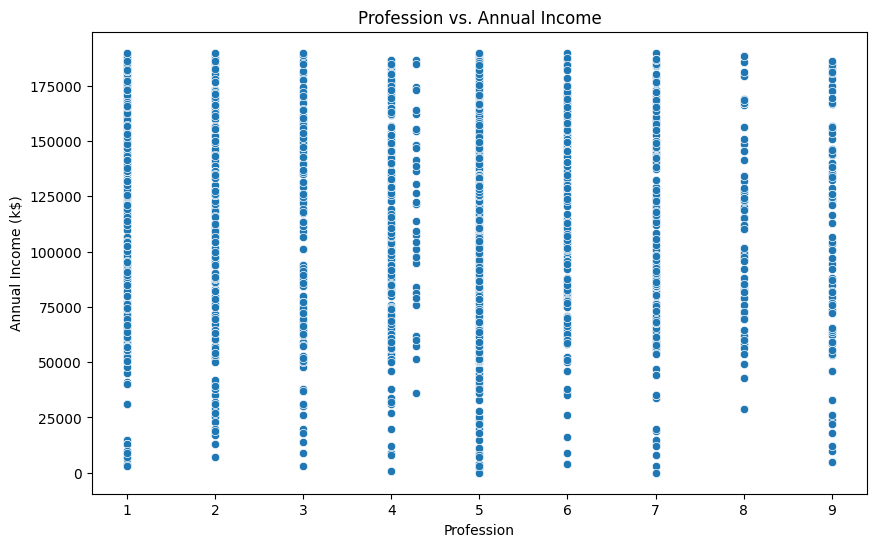

In [331]:
# scatterplot between profession and  anual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Profession', y='Annual Income ($)', data=df, palette='rainbow')
plt.title('Profession vs. Annual Income')
plt.xlabel('Profession')
plt.ylabel('Annual Income (k$)')
plt.show()

In [332]:
#profession with less than 50000 income artist, engineer,entertainment,lawyer,doctor,healthcare,marketing,executive

Gender Proportions:
Gender
1   0.59
0   0.41
Name: count, dtype: float64


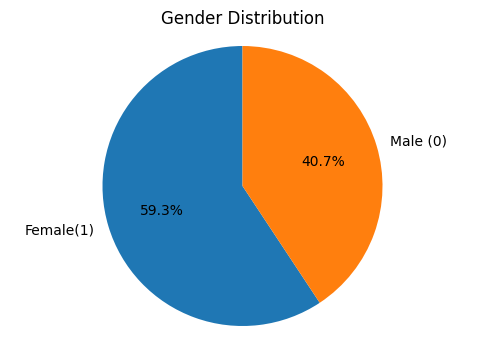

In [333]:
# gender proportion

# Calculate the gender proportion
gender_counts = df['Gender'].value_counts()
gender_proportions = gender_counts / len(df)

print("Gender Proportions:")
print(gender_proportions)

# Visualize gender proportions (optional)
plt.figure(figsize=(6, 4))
plt.pie(gender_proportions, labels=['Female(1)', 'Male (0)'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [334]:
# gender proprtions form the piechart is female - 59.3 and male is 40.7% so more female coustmers

Gender
0   50.94
1   50.97
Name: Spending Score (1-100), dtype: float64


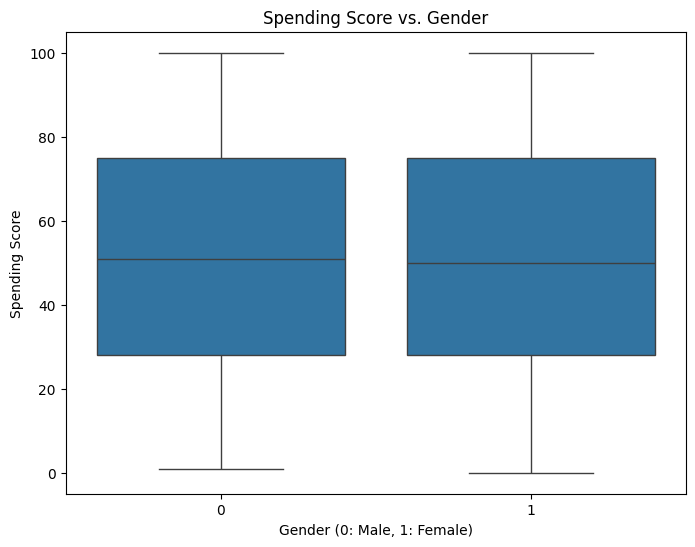

In [335]:
# Group data by gender and calculate the mean spending score
spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()

# Print the results
print(spending_by_gender)

# Visualize spending score distribution by gender using a boxplot (as you already have)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score vs. Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Spending Score')
plt.show()

In [336]:
#Spending score of both genders is same ,female has very minute increase in spending score than males

Gender
0   110,991.32
1   110,553.72
Name: Annual Income ($), dtype: float64


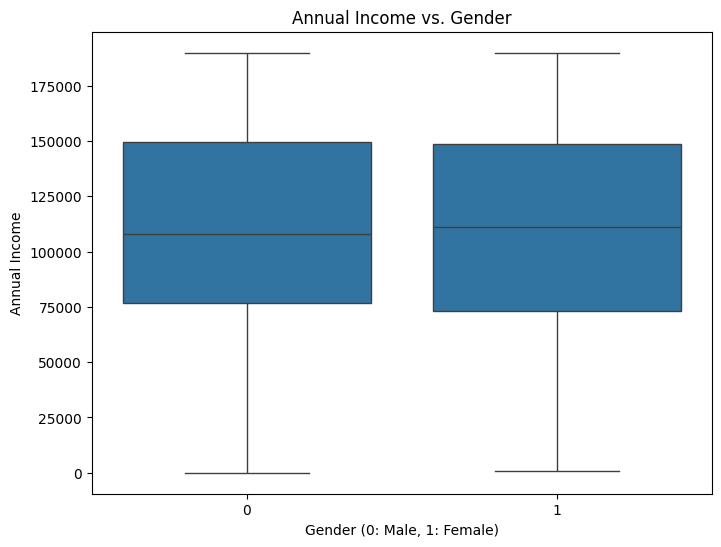

In [337]:
#  anual income gender

# Group data by gender and calculate the mean annual income
income_by_gender = df.groupby('Gender')['Annual Income ($)'].mean()

# Print the results
print(income_by_gender)

# Visualize annual income distribution by gender using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income ($)', data=df)
plt.title('Annual Income vs. Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Annual Income')
plt.show()

In [338]:
# Annual income of male is slightly higher compared to female but no vast diff in income between genders

In [339]:
# Calculate the average spending score based on age
avg_spending_score = df['Spending Score (1-100)'].mean()

# Find the age group with the highest average spending score above the overall average
high_spending_age_group = df[df['Spending Score (1-100)'] > avg_spending_score].groupby('Age')['Spending Score (1-100)'].mean().idxmax()

print(f"The age group with the highest spending score (above average) is: {high_spending_age_group}")

The age group with the highest spending score (above average) is: 48


In [340]:
# Create 'Age_Below_48' and 'Age_Above_48' columns
df['Age_Below_48'] = df['Age'].apply(lambda x: 1 if x <= 48 else 0)
df['Age_Above_48'] = df['Age'].apply(lambda x: 1 if x > 48 else 0)

In [341]:
# based on the average spending score the age group with highest spending score is 48 so faeturing new coloumns for age less than or equal to 48 and age above 48

In [342]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48
0,1,0,19,15000,39,1.00,1,4,1,0
1,2,0,21,35000,81,2.00,3,3,1,0
2,3,1,20,86000,6,2.00,1,1,1,0
3,4,1,23,59000,77,3.00,0,2,1,0
4,5,1,31,38000,40,4.00,2,6,1,0


   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

  Career Level  
0       Junior  
1  Entry-Level  
2       Junior  
3    Mid-Level  
4  Entry-Level  

Career 

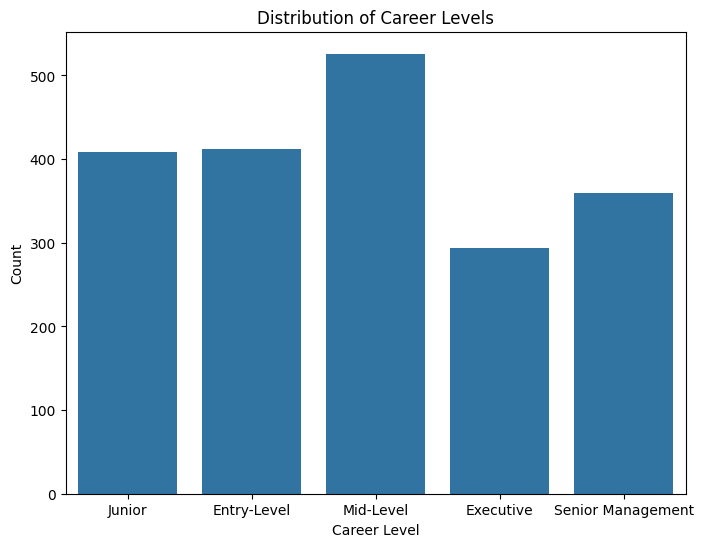

In [343]:
# Define career levels based on annual income and spending score
def assign_career_level(row):
    income = row['Annual Income ($)']
    spending = row['Spending Score (1-100)']

    if income > 80000 and spending > 80:
        return 'Executive'
    elif income > 60000 and spending > 60:
        return 'Senior Management'
    elif income > 40000 and spending > 40:
        return 'Mid-Level'
    elif income > 20000 and spending > 20:
        return 'Entry-Level'
    else:
        return 'Junior'

# Apply the function to create a new 'Career Level' column
df['Career Level'] = df.apply(assign_career_level, axis=1)

# Display the DataFrame with the new column
print(df.head())

# Analyze or visualize the 'Career Level' data as needed
# For example:
career_level_counts = df['Career Level'].value_counts()
print("\nCareer Level Counts:")
print(career_level_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Career Level', data=df)
plt.title('Distribution of Career Levels')
plt.xlabel('Career Level')
plt.ylabel('Count')
plt.show()

In [344]:
# Using annual income and spending score faeture new coloum carrer level
# for datapoints with income > 80000 and spending > 80 assign value Executive
# for datapoints with income > 60000 and spending > 60 assign value Senior Management
# for datapoints with income > 40000 and spending > 40 assign value Mid-Level
# for datapoints with income > 20000 and spending > 20 assign value Entry-Level
# for datapoints with income < 20000 and spending < 20 assign value Junior
# from the Histogram we can observe more coustmers with midlevel carrer, entrylevel

In [345]:

# Define career levels based on annual income and spending score with numerical values
def assign_career_level(row):
    income = row['Annual Income ($)']
    spending = row['Spending Score (1-100)']

    if income > 80000 and spending > 80:
        return 5  # Executive
    elif income > 60000 and spending > 60:
        return 4  # Senior Management
    elif income > 40000 and spending > 40:
        return 3  # Mid-Level
    elif income > 20000 and spending > 20:
        return 2  # Entry-Level
    else:
        return 1  # Junior

# Apply the function to create a new 'Career Level' column
df['Career Level'] = df.apply(assign_career_level, axis=1)

# Display the DataFrame with the new column
print(df.head())



   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  
0             1  
1             2  
2             1  
3             3  
4             2  


In [346]:
#Assign numerical values for all career levels,
# Executive - 5
# Senior Management - 4
# Mid-Level - 3
# Entry-Level- 2
# Junior -1

In [347]:
#concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size

In [348]:

# Feature Engineering: Combine Spending Score and Annual Income
# Example 1: Create a new feature 'Spending_Power' by multiplying the two
df['Spending_Power'] = df['Spending Score (1-100)'] * df['Annual Income ($)']

# Example 2: Create a new feature 'Income_Spending_Ratio'
# Handle potential ZeroDivisionError
df['Income_Spending_Ratio'] = df['Annual Income ($)'] / df['Spending Score (1-100)'].replace(0,1)


# Example 3:  Create spending score categories
def categorize_spending(spending_score):
    if spending_score <= 33:
        return 'Low'
    elif spending_score <= 66:
        return 'Medium'
    else:
        return 'High'

df['Spending_Category'] = df['Spending Score (1-100)'].apply(categorize_spending)


# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio Spending_Category  
0             1          585000    

In [349]:
#Combine Spending Score and Annual Income to feature new column Spending_Power
# for spending score <=33 assign value Low
# for spending score <=66 assign value Medium
# for spending score >66 assign value High

In [350]:
# Map spending categories to numerical values
spending_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['Spending_Category'] = df['Spending_Category'].map(spending_mapping)

# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  
0             1          585000   

In [351]:
#Assign numerical values for catergorial data in Spending_Category as Low -0 ,Medium-1, High- 2

In [352]:
# Define a function to categorize family size
def categorize_family_size(size):
    if size <= 2:
        return 'Small'
    elif size <= 4:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new 'Family_Size_Category' column
df['Family_Size_Category'] = df['Family Size'].apply(categorize_family_size)

# Display the DataFrame with the new column
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  \
0             1          585000  

In [353]:
# Map family size categories to numerical values
family_size_mapping = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

df['Family_Size_Category'] = df['Family_Size_Category'].map(family_size_mapping)

# Display the updated DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Profession  Work Experience  Family Size  Age_Below_48  Age_Above_48  \
0        1.00                1            4             1             0   
1        2.00                3            3             1             0   
2        2.00                1            1             1             0   
3        3.00                0            2             1             0   
4        4.00                2            6             1             0   

   Career Level  Spending_Power  Income_Spending_Ratio  Spending_Category  \
0             1          585000  

In [354]:
#From family size feature new column Family size category by
# assign small value for family size <=2
#assigning medium value for family size <=4
# assigning Large for family size >4
#Assign numerical values for small-0 ,medium-1, large-2

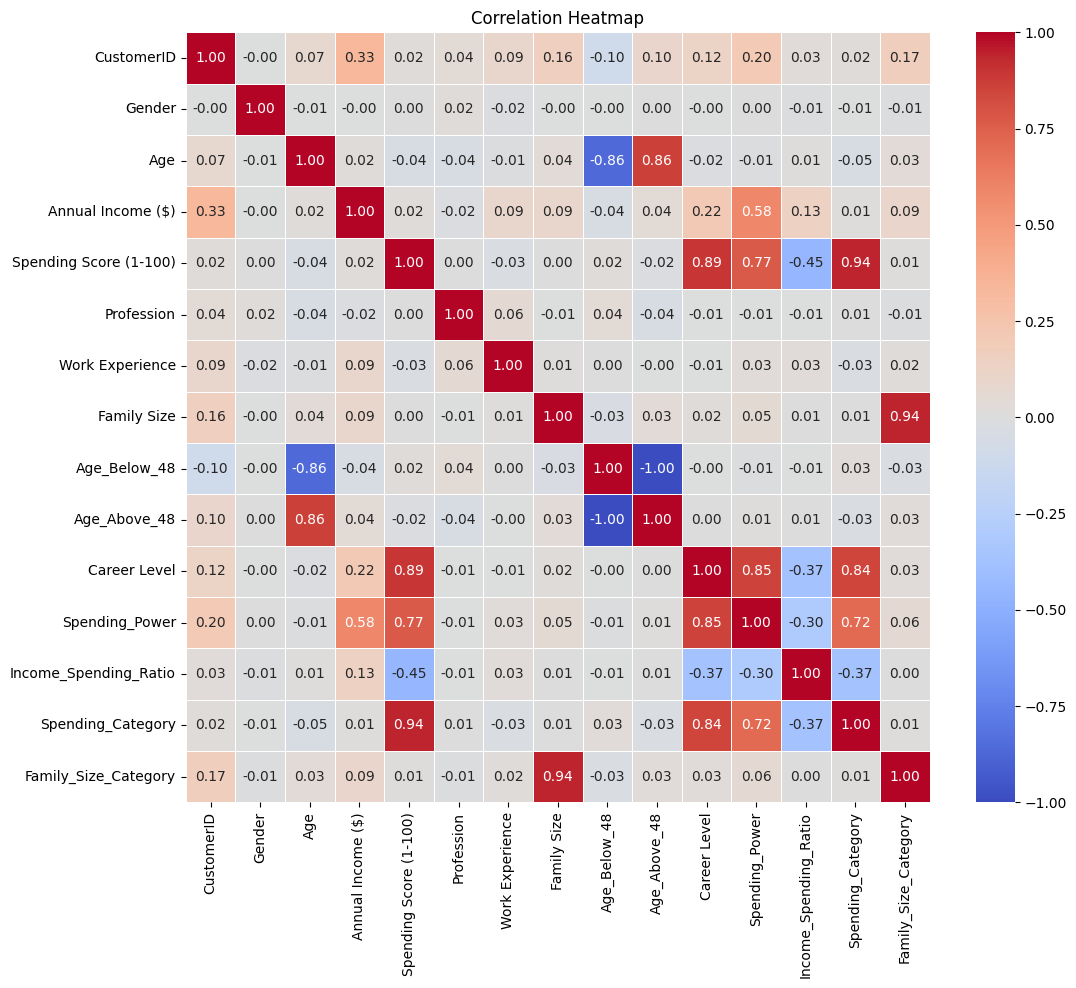

In [355]:
#Correlation heatmap
# Select only numeric columns for the correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [356]:
#drop colomns custmid,age, work experience,age group,spending power,income spending ratio

df = df.drop(['cust_id', 'age', 'age_group', 'spending_power','Family_Income_Interaction' ,'income_spending_ratio'], axis=1, errors='ignore')

In [357]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48,Career Level,Spending_Power,Income_Spending_Ratio,Spending_Category,Family_Size_Category
0,1,0,19,15000,39,1.00,1,4,1,0,1,585000,384.62,1,1
1,2,0,21,35000,81,2.00,3,3,1,0,2,2835000,432.10,2,1
2,3,1,20,86000,6,2.00,1,1,1,0,1,516000,"14,333.33",0,0
3,4,1,23,59000,77,3.00,0,2,1,0,3,4543000,766.23,2,0
4,5,1,31,38000,40,4.00,2,6,1,0,2,1520000,950.00,1,2


In [358]:
#target healthcare 1 artist 5

In [382]:
# Columns to apply log transformation
log_columns = ['Annual Income ($)']

# Columns to apply MinMaxScaler
minmax_columns = ['Spending Score (1-100)', 'Work Experience', 'Family Size', 'Profession']

# Apply log transformation
for col in log_columns:
    # Add 1 to handle potential zero values before applying the logarithm
    df[col + '_log'] = np.log1p(df[col])

# Apply MinMaxScaler
scaler = MinMaxScaler()

for col in minmax_columns:
    df[col + '_scaled'] = scaler.fit_transform(df[[col]])

In [360]:
#Using mimmax scaler to handle zero values so while scaling we don't get exponential values

In [383]:
#scaling /standardizing data so the all the data are in same units
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])
df_scaled

array([[-1.20706357, -1.05408932, -2.09350095, ..., -1.50360992,
        -0.00778425, -0.01537478],
       [-1.20706357, -0.98372287, -1.65613312, ..., -1.0451069 ,
         0.6998749 ,  1.38233287],
       [ 0.82845678, -1.0189061 , -0.54084515, ..., -1.0451069 ,
        -0.00778425, -0.01537478],
       ...,
       [-1.20706357,  1.33836975, -0.43235606, ..., -1.50360992,
         1.40753404, -0.71422861],
       [-1.20706357,  0.98653753,  1.56090408, ...,  0.78890521,
         1.40753404, -0.71422861],
       [-1.20706357,  1.44391941, -0.00266404, ..., -0.12810085,
         1.40753404, -0.71422861]])

In [384]:
#finding Kmeans for the above the data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if i > 4:
      break


In [363]:
#for finding wcss we use the range of clusters from 1 to 11 which is common range for kmeans clustering ,by giving a random state value we perform kmeans and find wcss for five clusters

In [385]:
wcss

[41999.99999999993,
 35231.64485014938,
 31583.803007614322,
 26808.010985696747,
 24174.149292558923]

In [386]:
##low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster
#So by plotting wcss values on a elbow graph we find the optimal no.of clusters the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters
#The meaning of this is the clusters before eblow point are added Wcss reduces significantly

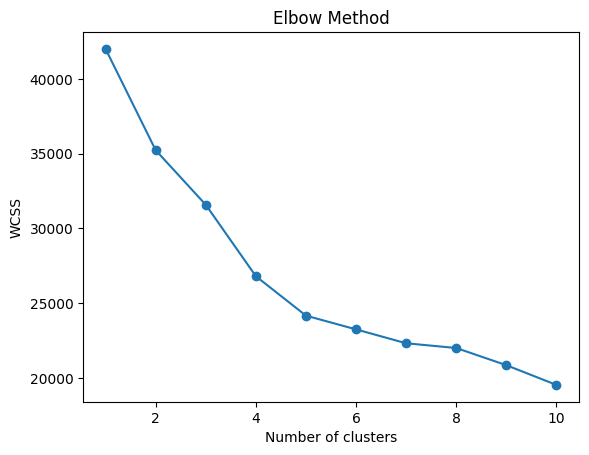

In [389]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [367]:
# from the elbow graph we can see an elbow point at 3 and 5 but it's not clear so futher analyze using silhoutee score graph

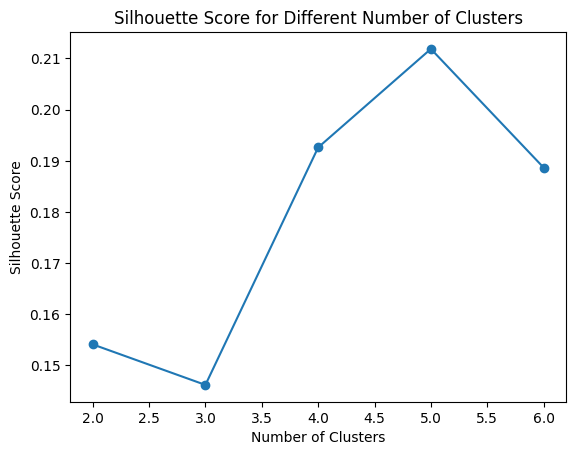

In [390]:
#using silhouette graph to find the optimal number of cluster more precisely
# Calculate Silhouette scores for different numbers of clusters
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    # Fit the model to the scaled data
    cluster_labels = kmeans.fit_predict(df_scaled)

    # Calculate the Silhouette score
    silhouette_avg.append(silhouette_score(df_scaled, cluster_labels))

# Plot Silhouette scores
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Number of Clusters")
plt.show()

In [369]:
#High silhouette score means optimal no.of clusters
# using High silohuette score from Silhouette Score Method we can determine optimal clusters as 5

In [370]:
# now optimal clusters for kmeans is 5 so using kmeans for 5 clusters
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [371]:
# performing kmeans clustering for 5 clusters

In [372]:
#giving cluster id for each cluster
clusters_new.labels_

array([2, 3, 2, ..., 4, 4, 4], dtype=int32)

In [373]:
#provinding new column id for cluster labels
df['clusterid_new'] = clusters_new.labels_

In [374]:
clusters_new.cluster_centers_

array([[ 0.03855336,  0.8956913 ,  0.26048805,  0.92768717, -0.09849692,
        -0.0083908 ,  0.19703859, -1.00702467,  1.00702467,  0.91286632,
         0.88105995, -0.28683772,  0.89004792,  0.22896079,  0.24220412,
         0.92768717, -0.0083908 ,  0.19703859, -0.09849692],
       [-0.01836176,  0.0669554 ,  0.02135655, -0.77530341, -0.01631535,
        -0.01829045,  1.19161132, -0.03025656,  0.03025656, -0.69489301,
        -0.60790057,  0.31523057, -0.74066599,  1.14873305,  0.08220193,
        -0.77530341, -0.01829045,  1.19161132, -0.01631535],
       [ 0.03194882, -0.82400365, -0.37662852, -0.60489982,  0.09633925,
         0.0280373 , -0.73793567,  0.99302433, -0.99302433, -0.70785139,
        -0.6981176 ,  0.14191091, -0.591112  , -0.74868407, -0.44277736,
        -0.60489982,  0.0280373 , -0.73793567,  0.09633925],
       [-0.03914206, -0.92909413,  0.22556704,  0.94900636,  0.04090847,
        -0.00341116,  0.07114056,  0.99302433, -0.99302433,  0.95358496,
         0.873

In [375]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Age_Below_48,Age_Above_48,...,Spending_Power,Income_Spending_Ratio,Spending_Category,Family_Size_Category,Annual Income ($)_log,Spending Score (1-100)_scaled,Work Experience_scaled,Family Size_scaled,Profession_scaled,clusterid_new
0,1,0,19,15000,39,1.00,1,4,1,0,...,585000,384.62,1,1,9.62,0.39,0.06,0.38,0.00,2
1,2,0,21,35000,81,2.00,3,3,1,0,...,2835000,432.10,2,1,10.46,0.81,0.19,0.25,0.12,3
2,3,1,20,86000,6,2.00,1,1,1,0,...,516000,"14,333.33",0,0,11.36,0.06,0.06,0.00,0.12,2
3,4,1,23,59000,77,3.00,0,2,1,0,...,4543000,766.23,2,0,10.99,0.77,0.00,0.12,0.25,3
4,5,1,31,38000,40,4.00,2,6,1,0,...,1520000,950.00,1,2,10.55,0.40,0.12,0.62,0.38,1


In [376]:
#Scaling the data
StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])

In [377]:
#segementation of each clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['segment'] = kmeans.fit_predict(scaled_data)

In [378]:
# Segments the data into 5 segments and fits the  datapoints to each segments by finding the nearest datapoint to each clusters

In [379]:
df['segment']

,segment
0,2
1,4
2,2
3,4
4,3
...,...
1995,3
1996,3
1997,1
1998,1


In [380]:
print("Segmented User Data:")
print(df)

Segmented User Data:
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1       0   19              15000                      39   
1              2       0   21              35000                      81   
2              3       1   20              86000                       6   
3              4       1   23              59000                      77   
4              5       1   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996       1   71             184387                      40   
1996        1997       1   91              73158                      32   
1997        1998       0   87              90961                      14   
1998        1999       0   77             182109                       4   
1999        2000       0   90             110610                      52   

      Profession  Work Experience  Family Size  Age_Below_48  Age_

Customer Segmentation:
      Annual Income ($)  Spending Score (1-100)  clusterid_new  segment
0                 15000                      39              2        2
1                 35000                      81              3        4
2                 86000                       6              2        2
3                 59000                      77              3        4
4                 38000                      40              1        3
...                 ...                     ...            ...      ...
1995             184387                      40              1        3
1996              73158                      32              1        3
1997              90961                      14              4        1
1998             182109                       4              4        1
1999             110610                      52              4        1

[2000 rows x 4 columns]

Cluster/Segment Statistics:
                       Annual Income ($)  Spending Score (1

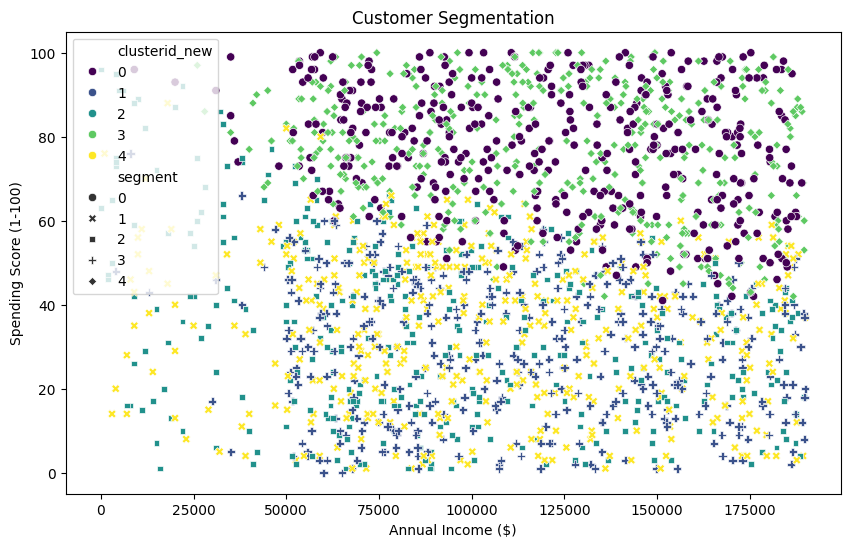

In [381]:
# display customer segmentation for new clusters and segment

# Display customer segmentation for new clusters and segments
print("Customer Segmentation:")
print(df[['Annual Income ($)', 'Spending Score (1-100)', 'clusterid_new', 'segment']])


# Further analysis and visualization (optional)
# Group by 'clusterid_new' and 'segment' to see characteristics of each segment
cluster_segment_stats = df.groupby(['clusterid_new', 'segment']).agg({
    'Annual Income ($)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'mean',  # Proportion of each gender in each cluster/segment
    'Profession': 'mean' # Mean profession in each cluster/segment (can also use value_counts)
    # Add other relevant statistics
})
print("\nCluster/Segment Statistics:")
print(cluster_segment_stats)

# Visualize the clusters/segments using scatter plots or other suitable methods
# Example:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', hue='clusterid_new', style='segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

1.   Segment 0 and 4 have income and spending score
2.   segment 1 ,2 and 3 has moderate income and spending score

---
concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size these could be the clusters.




# Kmeans clustering analysis

---
--->from the info we can see there are 2000 rows and 8 columns , two colomns have categorical data gender,profession, remaining numerical data
\
---->we can see diff between 75% and max values is high for 	Work Experience, Family size so boxplot and histplot is required for further analysis to find skewed data
\
---->Assigned numerical values for gender male as 0 and female as 1
\
----> finding the value counts for each profession
  

  *   Profession value counts for Artist is 612
  *   Profession value counts for Healthcare is 339
  * Profession value counts for Healthcare is 339
  * Profession value counts for Entertainment is 234
  * Profession value counts for Engineer is 179
  * Profession value counts for Doctor is 161
  * Profession value counts for Executive is 153
  * Profession value counts for Lawyer is 142
  * Profession value counts for Marketing is 85
  * Profession value counts for Homemaker is 60

\
---->Assigning numerical values for each profession
   * 'Healthcare': 1,
   * 'Engineer': 2,
   * 'Lawyer': 3,
   * 'Entertainment': 4,
   * 'Artist': 5,
   * 'Executive': 6,
   * 'Doctor': 7,
   * 'Homemaker': 8,
   * 'Marketing': 9
\
---->after assigning numerical values to categorial data we can see the diff between 75% and max values is high for Work Experience , Family Size, profession so boxplot and histplot is required for further analysis to find skewed data

----> from data visualization
  * Gender dose'nt have any outlier nor skewed and 1(female) has the highest count ~1200, male ~800 so more female coustmers
  * Age dose'nt have any outliers nor skewed and data is concentrated more between ~25 to 74 so people of diff age groups present
  * Annual income is concentrated more betweeen 75000 to 150000 and has no outliers so most coustmers have moderate annual income
  * Spending score has no outliers nor skewed and most data is concentrated between ~28 to 75 so most coustmers have average spending score
  * Profession most data is concentrated around 2 to 5, with 5 being highest so more coustmers have 'Engineer': 2,'Lawyer': 3,'Entertainment': 4,'Artist': 5,
  * work experience has only one outlier is skewed to right and data is highly concentrated between ~1.5 to 7.5 so most coustmers have less work experience
  * Family size is highly concentrated between 2 to 5 with highest family size as 2 and there are no outliers so most coustmers have average family size
\

----> To conclude there are more female coustmers, Coustmers are of diff age groups present, most coustmers have moderate annual income and average spending score, most coustmers have these professions artist,engineer,lawyer, entertainment, most coustmers have less work experience and most coustmers have average family size

---->Using IQR method fixing the outliers for work experience coloumn

---->Profession column has 35 missing valuses so filling the missing values with mean

---->from correlation heatmap we can see no features have high correlation with each other

---->from the scatterplot for spending score and eaah coloumn
  * age -more datapoints are scattering around 20 to 60 so these age groups have high spending score
  * annual income - above 50000 has more datapoints so coustmers with more than 50000 annual income have highspending score
  * Profession- 5 which is artist, healthcare-1 have high spending score
  * Work experience - more datapoint below 10 coustmers with less experience have high speending score
  * Family size - more datapoints scattered around 1 to 7 so average family size has high spending score
\

----> profession with less than 50000 income artist, engineer, entertainment,
      lawyer,doctor,healthcare,marketing,executive
\

---->gender proprtions form the piechart is female - 59.3 and male is 40.7% so more female coustmers
\
---->Spending score of both genders is same ,female has very minute increase in spending score than males
\
---->Annual income of male is slightly higher compared to female but no vast diff in income between genders
\
---->based on the average spending score the age group with highest spending score is 48 so faeturing new coloumns for age less than or equal to 48 and age above 48
\
---->Using annual income and spending score faeture new coloum carrer level
* for datapoints with income > 80000 and spending > 80 assign value Executive
* for datapoints with income > 60000 and spending > 60 assign value Senior management
* for datapoints with income > 40000 and spending > 40 assign value Mid-Level
* for datapoints with income > 20000 and spending > 20 assign value Entry-Level
* for datapoints with income < 20000 and spending < 20 assign value Junior
* from the Histogram we can observe more coustmers with midlevel carrer, entrylevel


---->Assign numerical values for all career levels,
* Executive - 5
* Senior Management - 4
* Mid-Level - 3
* Entry-Level- 2
* Junior -1


---->concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size

---->Combine Spending Score and Annual Income to feature new column Spending_Power
 * for spending score <=33 assign value Low
 * for spending score <=66 assign value Medium
 * for spending score >66 assign value High


---->Assign numerical values for catergorial data in Spending_Category as Low -0 ,Medium-1, High- 2

---->From family size feature new column Family size category by
* assign small value for family size <=2
* assigning medium value for family size <=4
* assigning Large for family size >4
* Assign numerical values for small-0 ,medium-1, large-2



--->droping the columns that dosen't contribute or unnecessary such as custmid,age, work experience,age group,spending power,income spending ratio

---->Using mimmax scaler to handle zero values so while scaling we don't get exponential values

--->wcss (within cluster sum of square) measures how closely the data points in a cluster are grouped around their centroid. It is the sum of the squared distances between each data point and its cluster's centroid. inertia is a measure of how tightly points are grouped around centroids


 *  So low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster
 * So by plotting wcss values on a elbow graph we find the optimal no.of clusters
the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters
 * The meaning of this is the clusters before eblow point are added Wcss reduces
  significantly

--->The silhouette score measures how well-separated and compact the clusters are. It considers both:

  *   Intra-cluster cohesion: How close data points are to others within the same cluster

  *   Inter-cluster separation: How far data points are from points in other clusters.

---->So high silhoutee score means optmial number of clusters

---->for finding wcss we use the range of clusters from 1 to 11 which is common range for kmeans clustering ,by giving a random state value we perform kmeans and find wcss for five clusters

---->low wcss/inertia means the cluster is effective or the data points are near to the centroid or within the cluster

--->So by plotting wcss values on a elbow graph we find the optimal no.of clusters the elbow point where we see a bend in the curve or where it flattens is the optimal no. of clusters

---->The meaning of this is the clusters before eblow point are added Wcss reduces significantly

---->from the elbow graph we can see an elbow point at 3 and 5 but it's not clear so futher anaalyze using silhoutee score graph

---->High silhouette score means optimal no.of clusters,High silohuette score from Silhouette Score Method we can determine optimal clusters as 5

----> perform kmeans for 5 clusters and lablel new clusters then Segments the data into 5 clusters/ segments and fits the  datapoints to each segments by finding the nearest datapoint to each clusters

---->#from the scatterplot we can see
*  Segment 0 and 4 have income and spending score
*  segment 1 ,2 and 3 has moderate income and spending score

---->So concentrate on entry level and mid level, targeting age groups, targeting high spending gender (female), targeting professing with high spending score, optimal family size these could be the clusters.















***Process : ***\
1.After importing the neccessary libraries, and reading the dataset we get the info of the dataset which gives the types of values that are present in the data set such as int, float, object etc. and the number of entries in the dataset etc.,
\
2.then we find the count ,mean ,standard deviation of data from which we can see whether the data is skewed by comapring the 75% to max value if the there is sudden jump or vast diff in values then we can assume the data is skewed
\
3.find the null values if present replace them with mean , median  and mode values mean,median for numerical data -if outliers present median and mode for categorial data
\
4.Visualize the data using


*   Histograms and density plots to visualize distributions.
*   Boxplots to detect outliers.

*   Scatter plots for numerical features to identify correlations.
*  Bar plots for categorical data.

*  Pairplots or correlation heatmaps for relationships among variables.
\
5.From the visualization if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value  then calulate upperbound and lowerbound values to fix them and apply log transform to fix skewness / e values.
\
6.Use Feature engineer if neccessary combine the coloumns or add new cloumns ,use label encoding for categorial data and scale or standardize the data so that all the data is in the same units without changing the range of data.
\
7.Analyse the correlation heatmap and find the coloumns that has hight correlation values with the target variable. Drop unesscary cloumns to improve the effeciency of the model